**ENVIRONMENT SETUP**

In [1]:
# for dowloading matplotlib and seaborn
!pip install matplotlib
!pip install seaborn --quiet
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\hp\anaconda3\lib\site-packages (0.12.2)


In [2]:
#importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
url = 'https://www.dropbox.com/scl/fi/yulqsl27le6yxxahu5cv9/loan.csv?rlkey=hpc13u5r1zjr829531ayxiuhx&st=nsvpzlcz&dl=1'
loan_data = pd.read_csv(url)

**DATA STUDY**

In [6]:
#checking the main columns of the data along with the values
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# listing all the columns of the data - loan.csv
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [8]:
#checking the shape of the data i.e, - No. of Rows and Columns
loan_data.shape

(39717, 111)

In [9]:
#getting info of the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [10]:
# Getting information on the data columns-data type

#this line of code shows all
#the output without truncation for better analysis
with pd.option_context('display.max_rows', None):
  print(loan_data.dtypes)

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [11]:
# Counting the null values in each column
with pd.option_context('display.max_rows', None):
  print(loan_data.isnull().sum())


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


**DATA CLEANING**

Based on the study of data *(number of NA values)* in the previous step, we can filter out the columns where the number of Null values is exactly equal to 39717 which is the total number of data points of the dataset.

This means that the entire column is not having any data apart from null values.

In [12]:
# Dropping the null columns

loan_data_filtered = loan_data.dropna(axis = 1, how = 'all')

# how = 'all' drops the column only if all the values are null.

In [13]:
# Recounting the null values in each column after dropping columns having all data as null
with pd.option_context('display.max_rows', None):
  print(loan_data_filtered.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [14]:
# Drop the columns with three most highest number of Null values
loan_data_filtered = loan_data_filtered.drop('next_pymnt_d', axis=1)
loan_data_filtered = loan_data_filtered.drop('mths_since_last_delinq', axis=1)
loan_data_filtered = loan_data_filtered.drop('mths_since_last_record', axis=1)


In [15]:
#calculating the number of unique values in each of the columns to further filter
#non-useful columns

loan_data_filtered_unique_values = loan_data_filtered.nunique(axis =0, dropna=True)
columns_to_filter_out = loan_data_filtered_unique_values[loan_data_filtered_unique_values <2]
columns_to_filter_out

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [16]:
# Dropping the columns from the data using the columns_to_filter_out

loan_data_filtered = loan_data_filtered.drop(columns_to_filter_out.index, axis = 1)

In [17]:
#Re-checking the shape of the filtered data
loan_data_filtered.shape

(39717, 45)

In [18]:
#Checking the data whether all the customers are unique or not
customers_unique = loan_data_filtered['id'].unique()
customers_unique.shape

(39717,)

This completes the inital cleaning process of the data.

In [19]:
#Re-describing the data after cleaning process
loan_data_filtered.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


In [20]:
#Describing the data for columns having categorical values
loan_data_filtered.describe(include='O')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39667,39646,39715
unique,2,371,7,35,28820,11,5,3,55,3,39717,26527,14,19615,823,50,526,1089,101,106
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,May-16,May-16
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,1,210,18641,2184,597,7099,370,977,1256,10308


**Insights :**
* Here, the int_rate is considered as a categorical variable while it needs to be converted to floating numerical variable.
* The most of the loan applicants are working for US Army.
* Home-ownership as RENT is the common feature among the applicants
* The main purpose of obtaining the loans is debt consolidation.

### **DATA CONVERSION & DERIVED COLUMNS**

In [21]:
#converting interest rate from categorical to numerical data
#first checking the interest rate whether it is having any null values
loan_data_filtered['int_rate'].isnull().sum()


0

In [22]:
#Data conversion

#1.Removing the % symbol from the interest_rate
if loan_data_filtered['int_rate'].dtype == 'object':
  int_column_clean = loan_data_filtered['int_rate'].str.rstrip('%')

loan_data_filtered['int_rate'] = pd.to_numeric(int_column_clean, errors='coerce')
#coerce forcefully converts all the string values to numeral. In case it can not able to convert, it will convert them to null values.

#counting the number of null values after conversion
loan_data_filtered['int_rate'].isnull().sum()

# Convert 'Term' column to numeric by removing ' months' and casting to integer
loan_data_filtered['term'] = loan_data_filtered['term'].str.replace(' months', '').astype(int)

Through this manipulation, the int_rate has been successfully converted to numerical values.

**Studying and Manipulating columns having data type as date**

In [23]:
#re-listing columns of filtered_data
loan_data_filtered.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
#drilling down to 'issue_d' column
loan_data_filtered['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [25]:
#Making a derived column 'issue_year' from the 'issue_d'

loan_data_filtered['issue_year'] = loan_data_filtered['issue_d'].apply(lambda x:'20'+ x.split('-')[1])
loan_data_filtered['issue_year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 39717, dtype: object

**DATA CHECKING**

The next step is to check the data for the following:
1.   Missing Values
2.   List Outliers



In [26]:
#checking missing i.e, null values in the present data
loan_data_filtered.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

In [27]:
#checking individually the distinct values in the columns having missing values
columns_to_check = ['emp_title', 'emp_length', 'title', 'last_pymnt_d', 'revol_util', 'desc', 'pub_rec_bankruptcies']
loan_data_filtered[columns_to_check].nunique()

emp_title               28820
emp_length                 11
title                   19615
last_pymnt_d              101
revol_util               1089
desc                    26527
pub_rec_bankruptcies        3
dtype: int64

In [28]:
#studying individually the columns of the data

loan_data_filtered['pub_rec_bankruptcies']


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: pub_rec_bankruptcies, Length: 39717, dtype: float64

# **HANDLING MISSING VALUES**

In [29]:
# filling null values with 0 in pub_rec_bankruptcies
loan_data_filtered['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [30]:
#filling 'Other Title' in null values of emp_title
loan_data_filtered['emp_title'].fillna('Other Title', inplace=True)

In [31]:
pd.set_option('display.max_columns', None)
print(loan_data_filtered[loan_data_filtered['emp_length'].isnull()])

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
168    1067644    1302032       2500         2500       2500.00000    36   
323    1058717    1290516      18000        18000      18000.00000    60   
394    1064582    1298394       4000         4000       4000.00000    36   
422    1064366    1298164       1000         1000       1000.00000    36   
439    1063912    1296491       8250         8250       8250.00000    36   
...        ...        ...        ...          ...              ...   ...   
32591   480410     610728      10000        10000       9975.00000    36   
32608   480216     610335       3700         3700       3700.00000    36   
32621   479954     609955      10000        10000       9731.17513    36   
32631   479836     609803       6000         6000       6000.00000    36   
32665   479468     609246      25000        25000      23912.90328    36   

       int_rate  installment grade sub_grade    emp_title emp_length  \
168        7.51

In [32]:
#checking mean annual income of people based on emp_length

loan_data_filtered.groupby('emp_length')['annual_inc'].mean()

emp_length
1 year       62644.619630
10+ years    81706.534351
2 years      63274.658548
3 years      66787.181446
4 years      66583.756967
5 years      68225.204153
6 years      68184.618605
7 years      69153.096943
8 years      74590.468519
9 years      74474.429205
< 1 year     60860.234032
Name: annual_inc, dtype: float64

one option would have been to substitute the emp_length based on the annual income but since the number of null values is 1075. All these entries having null emp_length as null value will be dropped.

In [33]:
#dropping null values from the emp_length column

loan_data_filtered.dropna(subset=['emp_length'], inplace=True)

In [34]:
#substituting null values in desc column with 'loan'

loan_data_filtered['desc'].fillna('loan', inplace=True)

In [35]:
#substituting null values in title column with 'loan'
loan_data_filtered['title'].fillna('loan', inplace=True)


In [36]:
#dropping null values from revol_util, last_pymnt_d, last_credit_pull_d

loan_data_filtered.dropna(subset = ['revol_util', 'last_pymnt_d', 'last_credit_pull_d'], inplace = True)


In [39]:
# Re-checking the null values after the data cleaning process
loan_data_filtered.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


# **UNIVARIATE ANALYSIS**
After the completion of the data cleaning procedure, the next step is to create insights from single variables.

In [38]:
# checking data type of the loan_amount.
loan_data_filtered['loan_amnt'].dtype

dtype('int64')

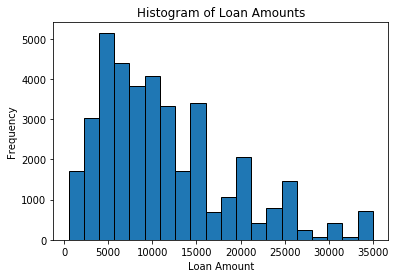

In [39]:
#make a  histogram of loan_amnt

plt.hist(loan_data_filtered['loan_amnt'], bins=20, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amounts')
plt.show()


**Insight** :
The most common amount of loan taken is in the range from 5,000 to 10,000.


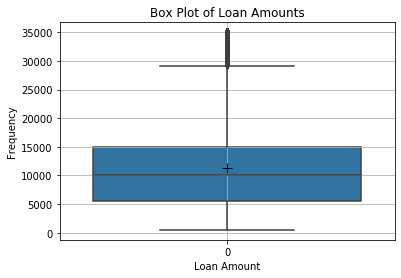

In [40]:
# To understand the distribution of the loan amount and also to identify the outliers,
# box plot need to be plotted.

sns.boxplot(data = loan_data_filtered['loan_amnt'], showmeans = True,
            meanprops = {
                "marker": "+",
                "markeredgecolor" : "black",
                "markersize" : "10"
            })
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Box Plot of Loan Amounts')
plt.grid(True)
plt.show()


**Insights** :
* The above Box plot show that, the outliers starts from just below 30,000 and then continue upwards.
* The mean of the data is shown with + symbol.



# **Removing the outliers**
* On the basis of the above box-plot it is clear that the data is having certain outliers.
* To keep analysis sane, all the entries above 30,000 can be removed.

In [41]:
#removing the outliers

loan_data_filtered = loan_data_filtered[loan_data_filtered['loan_amnt'] < 30000]

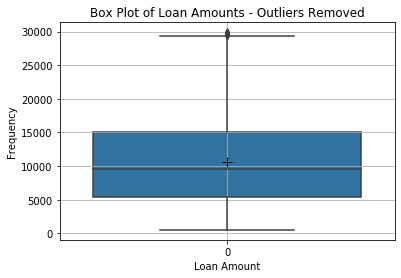

In [42]:
#replotting the loan-amount boxplot

sns.boxplot(data = loan_data_filtered['loan_amnt'], showmeans = True,
            meanprops = {
                "marker": "+",
                "markeredgecolor" : "black",
                "markersize" : "10"
            })
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Box Plot of Loan Amounts - Outliers Removed')
plt.grid(True)
plt.show()

**Insight :**

Here the loan amount varies from 0 to 30000 and 25% is more than 5000, 50% is less than 10000 and 75% is 15000.

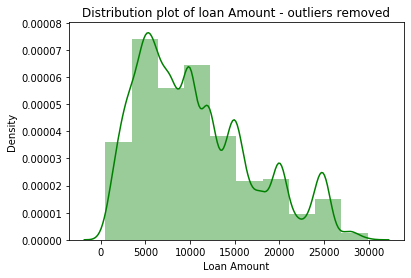

In [43]:
#Distribution Plot of loan amount to customers - with outliers removed
ax=sns.distplot(loan_data_filtered['loan_amnt'],bins=10,color='green')
ax.set(xlabel='Loan Amount',title='Distribution plot of loan Amount - outliers removed')
plt.show()

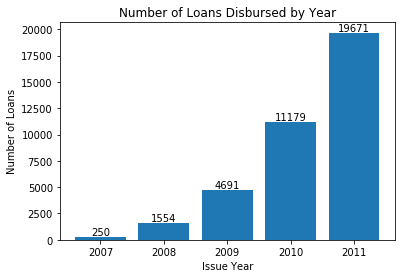

In [44]:
# Analysing the number of loans disbursed year-wise

# Count the number of loans for each year
loan_count_by_year = loan_data_filtered['issue_year'].value_counts().sort_index()

# Plotting the graphs
plt.bar(loan_count_by_year.index, loan_count_by_year.values)
plt.xlabel('Issue Year')
plt.ylabel('Number of Loans')
plt.title('Number of Loans Disbursed by Year')

#adding data labels on to the bars of the plot
for i,v in enumerate(loan_count_by_year.values):
  plt.text(i, v, str(v), ha = 'center', va = 'bottom')

plt.show()

**Insight :**

It is clear that the number of loans disbursed increased yearly.

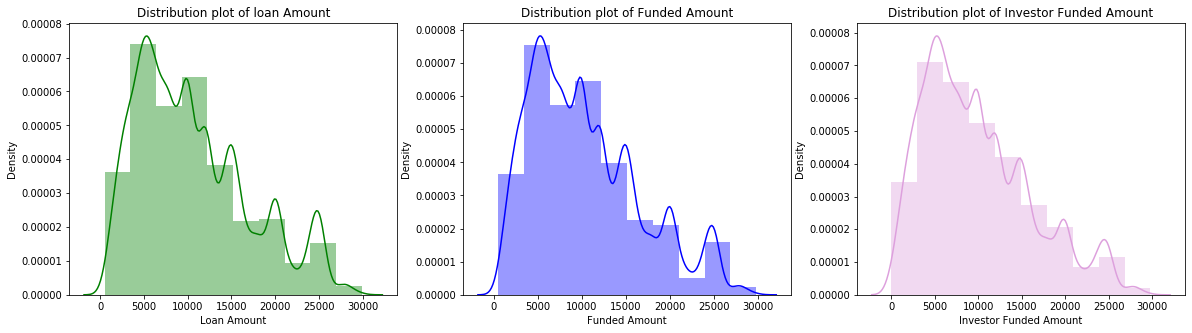

In [45]:
# Distribution of Loan amounts,funded_amnt and funded_amnt_inv using distribution plot

#Creating 3 subplots
fig, ax = plt.subplots(1,3,figsize=(20,5))

#Distribution plot of loan amount
sns.distplot(loan_data_filtered['loan_amnt'], ax=ax[0], bins=10, color='green')
ax[0].set(xlabel='Loan Amount',title='Distribution plot of loan Amount')

#Distribution plot of funded amount
sns.distplot(loan_data_filtered['funded_amnt'], ax=ax[1], bins=10, color='blue')
ax[1].set(xlabel='Funded Amount',title='Distribution plot of Funded Amount')

#Distribution plot of investor funded amount
sns.distplot(loan_data_filtered['funded_amnt_inv'], ax=ax[2], bins=10, color='plum')
ax[2].set(xlabel='Investor Funded Amount',title='Distribution plot of Investor Funded Amount')

plt.show()


**Insight :**

Distribution of Loan Amounts,Funded Amount and Investor Funded Amount are looking similar as per above distribution plots.

In [46]:
#Counting the number of categorical values of loan status
loan_status_counts = loan_data_filtered['loan_status'].value_counts()
loan_status_counts

Fully Paid     31298
Charged Off     5080
Current          967
Name: loan_status, dtype: int64

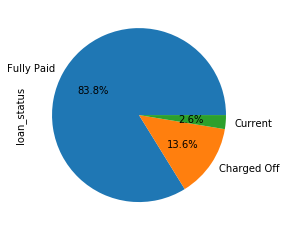

In [47]:
# Plotting the loan_status_counts data as pie chart
loan_status_counts.plot(kind = 'pie', autopct = '%1.1f%%')
#Addition of percentage labels is done using autopct command
# %1.1f%% specifies to provide the label results with 1 decimal value and percentage symbol
plt.show()

**Insights :**

* Around 13.6% of the customers have not been able to completely repay the loans and have been charged off by the lending club.
* Majority of the customers (83.8%) have completely paid off the loan.
* Around 2.6% of customers are currently re-paying the loan.

Drop Current loan status from the rows, becuase it will not provide any past data.
It is still in running mode.

In [48]:
#dropping Current from loan_status
loan_status_list = ['Fully Paid','Charged Off']
loan_data_filtered=loan_data_filtered[loan_data_filtered['loan_status'].isin(loan_status_list)]


In [49]:
#Again counting the number of categorical values of loan status
loan_status_counts = loan_data_filtered['loan_status'].value_counts()
loan_status_counts

Fully Paid     31298
Charged Off     5080
Name: loan_status, dtype: int64

Analysing the percentage of customers who have paid highest interest


In [50]:
int_rate_counts = loan_data_filtered['int_rate'].value_counts()
int_rate_counts

10.99    865
7.51     753
11.49    752
7.88     701
13.49    690
        ... 
16.01      1
22.64      1
16.96      1
18.36      1
17.54      1
Name: int_rate, Length: 370, dtype: int64

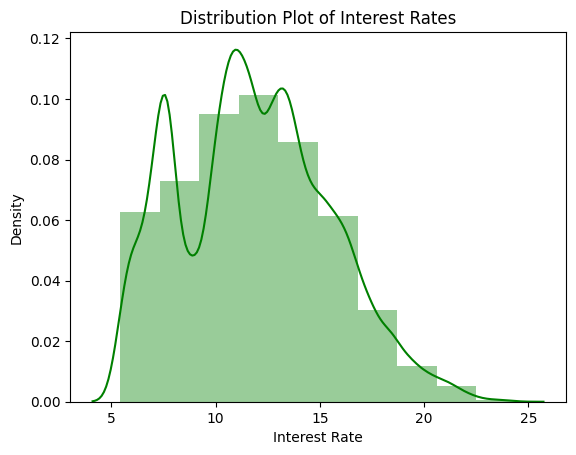

In [53]:
# Plotting a distribution plot of interest rates.

graph = sns.distplot(loan_data_filtered['int_rate'], bins=10, color='green')
graph.set(xlabel='Interest Rate', title='Distribution Plot of Interest Rates')
plt.show()

**Insight :**
Majority of the loans disbursed are having their interest rates in the range of 10% to 15%.

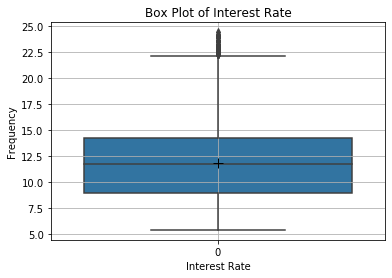

In [52]:
#Plotting box plot of interest rates.

sns.boxplot(data = loan_data_filtered['int_rate'], showmeans = True,
            meanprops = {
                "marker": "+",
                "markeredgecolor" : "black",
                "markersize" : "10"
            })
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Box Plot of Interest Rate')
plt.grid(True)
plt.show()

**Insight :**

The outliers from this box plot are evident above the mark of 22.5%.




# **Removing the outliers**
* On the basis of the above box-plot it is clear that evident above the mark of 22.5% having certain outliers.
* To keep analysis sane, all the entries above 22.5% can be removed.

In [53]:
#removing the outliers
loan_data_filtered = loan_data_filtered[loan_data_filtered['int_rate'] < 22.5]

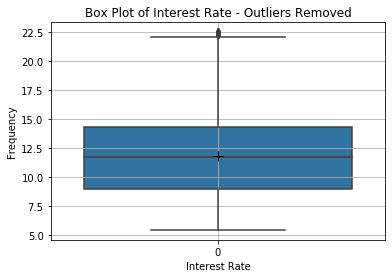

In [54]:
#replotting the interest rate boxplot
sns.boxplot(data = loan_data_filtered['int_rate'], showmeans = True,
            meanprops = {
                "marker": "+",
                "markeredgecolor" : "black",
                "markersize" : "10"
            })
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Box Plot of Interest Rate - Outliers Removed')
plt.grid(True)
plt.show()


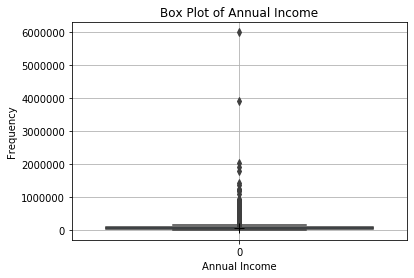

In [55]:
#Univariate Analysis on the Annual Income
#plotting the box plot of annual income
sns.boxplot(data = loan_data_filtered['annual_inc'], showmeans = True,
            meanprops = {
                "marker": "+",
                "markeredgecolor" : "black",
                "markersize" : "10"
            })
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Box Plot of Annual Income')
plt.grid(True)
plt.show()

# **Removing the outliers**
There are outliers in above box plot


In [56]:
# Devide the the Annual Income as per percentage
loan_data_filtered['annual_inc'].quantile([0.25,0.75,0.90,0.95,0.99])

0.25     40048.0
0.75     80000.0
0.90    112225.8
0.95    138000.0
0.99    220000.0
Name: annual_inc, dtype: float64

In [57]:
#removing the outliers from Annual Income by taking a threshold of 95 percentile
loan_data_filtered = loan_data_filtered[loan_data_filtered['annual_inc'] < loan_data_filtered['annual_inc'].quantile(0.95)]


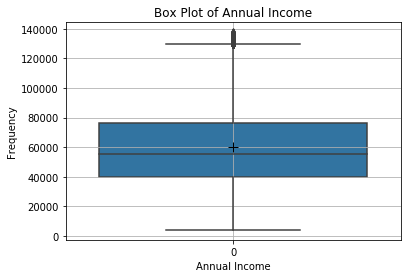

In [58]:
#plotting the box plot of annual income after removing the outliers
sns.boxplot(data = loan_data_filtered['annual_inc'], showmeans = True,
            meanprops = {
                "marker": "+",
                "markeredgecolor" : "black",
                "markersize" : "10"
            })
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Box Plot of Annual Income')
plt.grid(True)
plt.show()

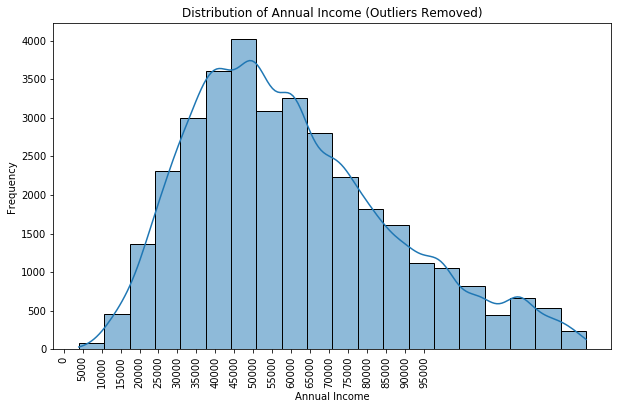

In [59]:
# Histogram for annual income distribution after removing outliers
plt.figure(figsize=(10,6))
sns.histplot(loan_data_filtered['annual_inc'], bins=20, kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income (Outliers Removed)')
plt.xticks(np.arange(0, 100000, 5000))
plt.xticks(rotation=90)
plt.show()


**Insight :**

The above Histogram shows most of the Annual Income are in the range 30000-75000.

In [60]:
# Univariate Analysis on the purpose of loan - listing the counts of the purpose

purpose_counts = loan_data_filtered['purpose'].value_counts()
purpose_counts

debt_consolidation    16312
credit_card            4532
other                  3473
home_improvement       2364
major_purchase         1936
small_business         1490
car                    1388
wedding                 859
medical                 609
moving                  516
vacation                336
house                   309
educational             300
renewable_energy         83
Name: purpose, dtype: int64

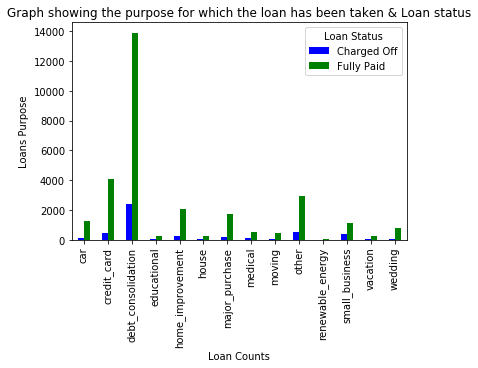

In [61]:
# To plot the grouped categorical bar chart,
grouped_data = loan_data_filtered.groupby(['purpose', 'loan_status']).size().unstack()

grouped_data.plot(kind = 'bar',color=['blue', 'green'])
plt.title('Graph showing the purpose for which the loan has been taken & Loan status')
plt.xlabel('Loan Counts')
plt.ylabel('Loans Purpose')
plt.xticks(rotation=90)
plt.legend(title='Loan Status')
plt.show()

**Insight :**

The bar chart shows the loan taken for debt_consolidation having the highest fully paid loan status.


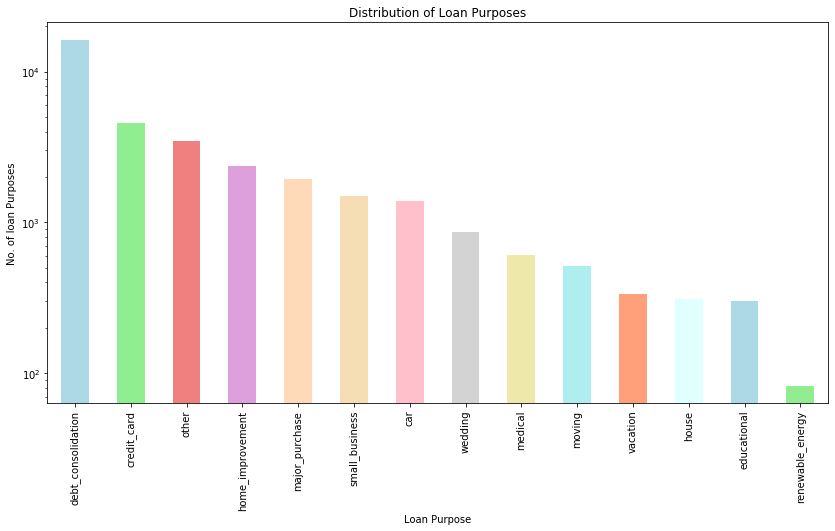

In [62]:
#To plot bar chart to show the different loan purpose from the lending clubs
plt.figure(figsize=(14,7))
grouped_data = loan_data_filtered.groupby(['purpose']).size().sort_values(ascending=False)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'plum', 'peachpuff', 'wheat', 'pink', 'lightgray', 'palegoldenrod', 'paleturquoise', 'lightsalmon', 'lightcyan']
grouped_data.plot(kind = 'bar',color=colors)
#purpose_counts.plot(kind='bar')
plt.xlabel('Loan Purpose')
plt.ylabel('No. of loan Purposes')
plt.title('Distribution of Loan Purposes')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**Insights :**

* The five major purposes of Loan applications are - 'debt_consolidation',
'credit_card', 'other', 'home_improvement' and 'major_purchase'.
* The 'debt_consolidation' is the highest loan purpose.






In [63]:
#Making a derived column 'term_months' from the 'term'

loan_data_filtered['term_months'] = loan_data_filtered['term'].apply(lambda x: x)
loan_data_filtered['term_months']


0        36
1        60
2        36
3        36
5        36
         ..
39711    36
39712    36
39713    36
39714    36
39716    36
Name: term_months, Length: 34507, dtype: int64

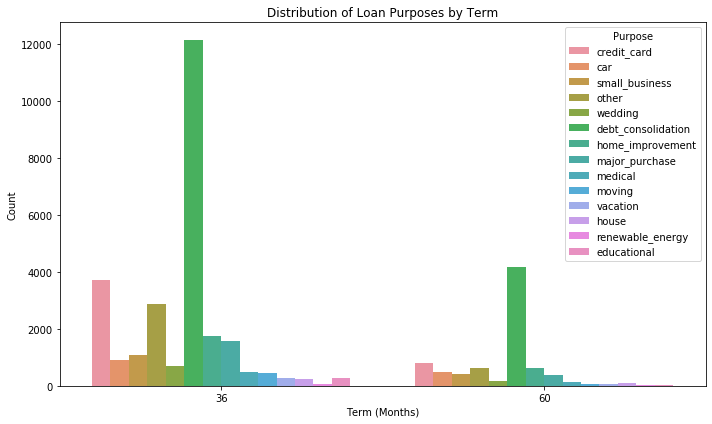

In [64]:
# plot the bar chart between term_months and purpose to calculate the mostly loan generte for how many months
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_filtered, x='term_months', hue='purpose')
plt.xlabel('Term (Months)')
plt.ylabel('Count')
plt.title('Distribution of Loan Purposes by Term')
plt.xticks(rotation=360)
plt.legend(title='Purpose', loc='upper right')
plt.tight_layout()
plt.show()


**Insight :**

From above bar chart, it is showing mostly loan generate in 36 months.

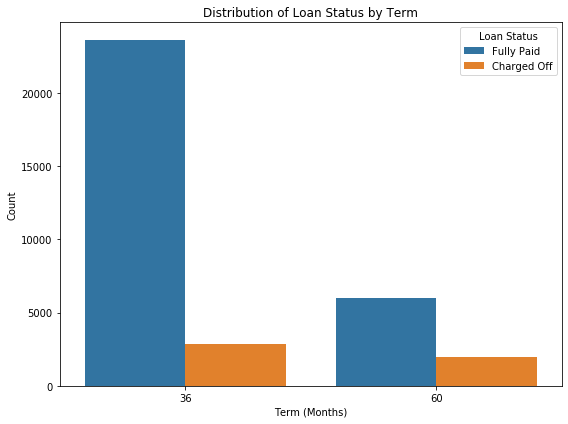

In [65]:
#plot bar chart between term_months and loan status with bin

plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data_filtered, x='term_months', hue='loan_status')
plt.xlabel('Term (Months)')
plt.ylabel('Count')
plt.title('Distribution of Loan Status by Term')
plt.xticks(rotation=360)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()


**Insights :**

* From above bar chart, it is showing that more customers who have not been able to completely repay the loans had taken the loan for 36 months than the customers who had taken the loan for 60 months.
* More customers had taken the loan for 36 months and able to fully paid the loans.

In [66]:
# Count the no. of loan defaulters according to grade
loan_defaulter = loan_data_filtered[loan_data_filtered['loan_status'] == 'Charged Off'].groupby('grade')['loan_status'].count()
loan_grade_total = loan_data_filtered.groupby('grade')['loan_status'].count()

#Calculate the percentage of loan defaulters according to grade
loan_grade_default_percentage = (loan_defaulter/ loan_grade_total) * 100
loan_grade_default_percentage

grade
A     5.899061
B    11.966297
C    16.912488
D    21.781092
E    26.354794
F    31.469441
G    32.608696
Name: loan_status, dtype: float64

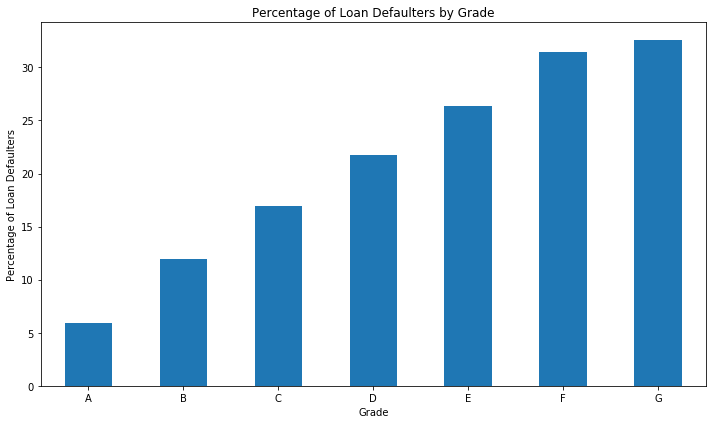

In [67]:
# Plot a bar chart to visualize the percentage of loan defaulters by grade
plt.figure(figsize=(10, 6))
loan_grade_default_percentage.plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Percentage of Loan Defaulters')
plt.title('Percentage of Loan Defaulters by Grade')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

**Insight :**

The highest percentage of Defaulters are in Grade G group.

In [68]:
# Count the no. of loan defaulters according to Loan Purpose
loan_defaulters = loan_data_filtered[loan_data_filtered['loan_status'] == 'Charged Off'].groupby('purpose')['loan_status'].count()
loan_purpose_total = loan_data_filtered.groupby('purpose')['loan_status'].count()

#Calculate the percentage of loan defaulters according to Loan Purpose
loan_purpose_default_percentage = (loan_defaulters/ loan_purpose_total) * 100
loan_purpose_default_percentage.sort_values(ascending=False)

purpose
small_business        26.442953
renewable_energy      18.072289
educational           16.333333
moving                15.891473
other                 15.634898
medical               15.599343
house                 15.533981
debt_consolidation    14.798921
vacation              14.583333
home_improvement      12.182741
car                   10.951009
credit_card           10.260371
major_purchase        10.175620
wedding                9.429569
Name: loan_status, dtype: float64

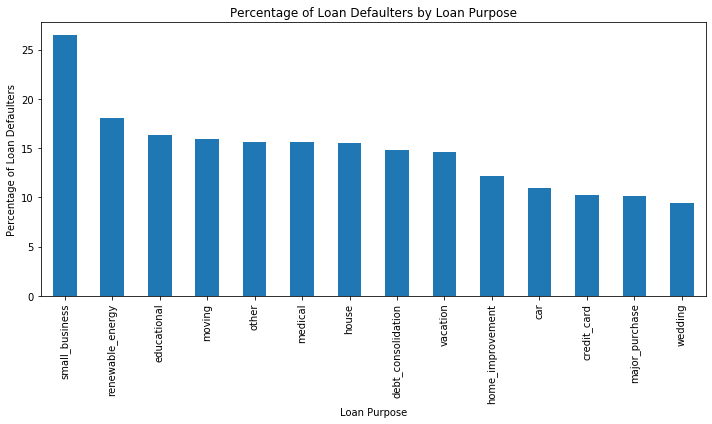

In [69]:
# Plot a bar chart to visualize the percentage of loan defaulters by Loan Purpose
plt.figure(figsize=(10, 6))
loan_purpose_default_percentage.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage of Loan Defaulters')
plt.title('Percentage of Loan Defaulters by Loan Purpose')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insight :**

The percentage of risk of Defaulters is the largest in the 'small_business' Loan Purpose, followed by 'renewable_energy' , 'educational' and so on.

In [70]:
#calculate the percentage of loan defaulters according to address state
# Count the no. of loan defaulters according to address state
loan_defaulters_by_state = loan_data_filtered[loan_data_filtered['loan_status'] == 'Charged Off'].groupby('addr_state')['loan_status'].count()
loan_total_by_state = loan_data_filtered.groupby('addr_state')['loan_status'].count()

# Calculate the percentage of loan defaulters according to address state
loan_state_default_percentage = (loan_defaulters_by_state / loan_total_by_state) * 100

# Round the percentages to 2 decimal places and sort in descending order
loan_state_default_percentage = loan_state_default_percentage.round(2).dropna().sort_values(ascending=False)

print(loan_state_default_percentage)


addr_state
NE    60.00
NV    21.08
AK    20.00
ID    20.00
SD    18.64
HI    17.76
FL    17.52
NM    16.67
MO    16.17
NJ    15.71
OR    15.69
GA    15.66
CA    15.58
NC    15.49
WA    15.48
MD    15.30
OK    14.76
UT    14.72
SC    14.66
NH    14.39
KY    14.14
MI    14.13
AZ    14.13
WI    13.60
MN    13.58
IL    13.39
RI    13.11
NY    12.94
CT    12.88
LA    12.83
WV    12.50
VA    12.15
OH    12.13
CO    12.09
MA    11.82
TN    11.76
AR    11.63
PA    11.48
TX    11.19
AL    11.03
MT    10.96
DE    10.58
MS    10.53
KS    10.22
VT     9.80
DC     5.95
WY     2.74
Name: loan_status, dtype: float64


In [71]:
#take top 20 states for our analysis
loan_state_default_percentage_top_20 = loan_state_default_percentage.head(20)
loan_state_default_percentage_top_20


addr_state
NE    60.00
NV    21.08
AK    20.00
ID    20.00
SD    18.64
HI    17.76
FL    17.52
NM    16.67
MO    16.17
NJ    15.71
OR    15.69
GA    15.66
CA    15.58
NC    15.49
WA    15.48
MD    15.30
OK    14.76
UT    14.72
SC    14.66
NH    14.39
Name: loan_status, dtype: float64

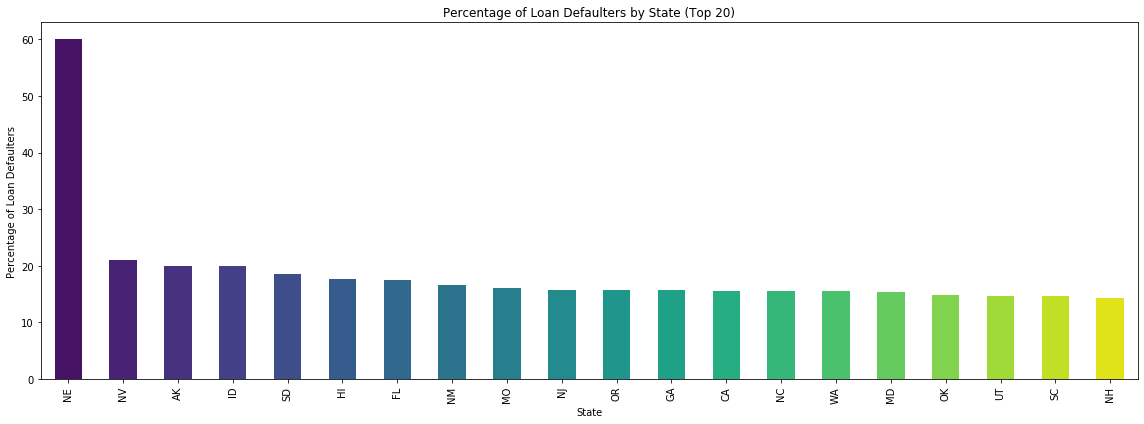

In [72]:
# Plot a bar chart to visualize the percentage of loan defaulters by address state (top 20 states)
plt.figure(figsize=(16, 6))
colors = sns.color_palette("viridis", len(loan_state_default_percentage_top_20))
loan_state_default_percentage_top_20.plot(kind='bar', color=colors)
plt.xlabel('State')
plt.ylabel('Percentage of Loan Defaulters')
plt.title('Percentage of Loan Defaulters by State (Top 20)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Insights :**



*   The percentage of Defaulters is maximum from NE (State) which is nearly equal to 60%.
*   The percentage of Defaulters for other states are slightly varies.



In [73]:
# Count the no. of loan defaulters according to home ownership
loan_defaulters_by_home_ownership = loan_data_filtered[loan_data_filtered['loan_status'] == 'Charged Off'].groupby('home_ownership')['loan_status'].count()
loan_total_by_home_ownership = loan_data_filtered.groupby('home_ownership')['loan_status'].count()

# Calculate the percentage of loan defaulters according to home ownership
loan_home_ownership_default_percentage = (loan_defaulters_by_home_ownership / loan_total_by_home_ownership) * 100

# Round the percentages to 2 decimal places and sort in descending order
loan_home_ownership_default_percentage = loan_home_ownership_default_percentage.round(2).dropna().sort_values(ascending=False)

print(loan_home_ownership_default_percentage)




home_ownership
OTHER       18.89
RENT        14.69
OWN         14.35
MORTGAGE    13.37
Name: loan_status, dtype: float64


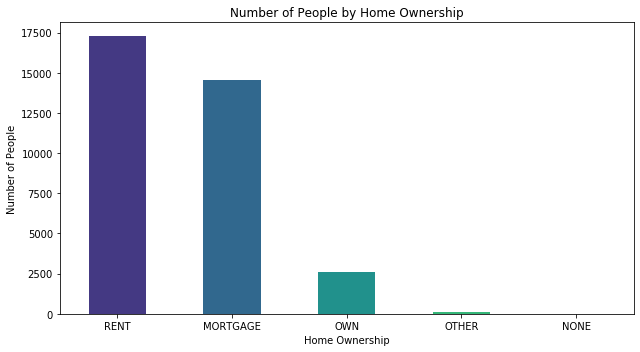

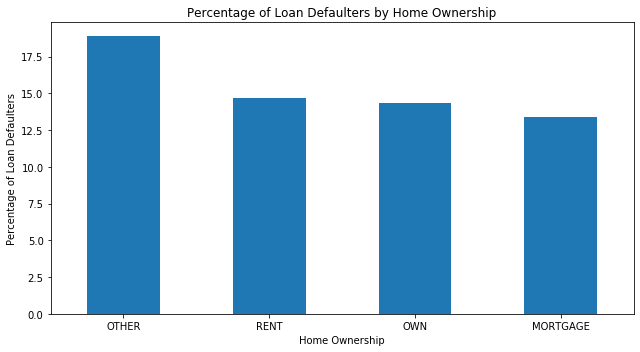

In [74]:
# Count the number of people for each home ownership category
home_ownership_counts = loan_data_filtered['home_ownership'].value_counts()

# Plot a bar chart to visualize the number of people by home ownership
plt.figure(figsize=(9, 5))
colors = sns.color_palette("viridis", len(home_ownership_counts))
home_ownership_counts.plot(kind='bar', color=colors)
plt.xlabel('Home Ownership')
plt.ylabel('Number of People')
plt.title('Number of People by Home Ownership')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot a bar chart to visualize the percentage of loan defaulters by home ownership
plt.figure(figsize=(9, 5))
loan_home_ownership_default_percentage.plot(kind='bar')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage of Loan Defaulters')
plt.title('Percentage of Loan Defaulters by Home Ownership')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insights :**

*   The highest number of people who have home ownership is in 'Rent'.
*   But percentage of defaulter under home ownership is 'Other' followed by 'Rent' and 'Own' and 'Mortgage'.



# **BIVARIATE ANALYSIS**


In [75]:
loan_data_filtered.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'term_months'],
      dtype='object')

In [76]:
columns=['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','total_pymnt']
loan_data_filtered[columns]=loan_data_filtered[columns].apply(pd.to_numeric)


**Correlation Analysis of Bivariate Matrix**

In [77]:
# Calculate the correlation matrix
loan_data_filtered_correlation = loan_data_filtered[columns].corr()
loan_data_filtered_correlation

,loan_amnt,funded_amnt,int_rate,funded_amnt_inv,installment,annual_inc,dti,total_pymnt
loan_amnt,1.000000,0.981029,0.248648,0.926566,0.927775,0.365970,0.092840,0.877095
funded_amnt,0.981029,1.000000,0.257521,0.945900,0.954531,0.362040,0.091841,0.894509
int_rate,0.248648,0.257521,1.000000,0.252206,0.231047,0.021285,0.109572,0.249252
funded_amnt_inv,0.926566,0.945900,0.252206,1.000000,0.887703,0.343803,0.100875,0.863486
installment,0.927775,0.954531,0.231047,0.887703,1.000000,0.361089,0.078725,0.850420
annual_inc,0.365970,0.362040,0.021285,0.343803,0.361089,1.000000,-0.079427,0.346984
dti,0.092840,0.091841,0.109572,0.100875,0.078725,-0.079427,1.000000,0.087462
total_pymnt,0.877095,0.894509,0.249252,0.863486,0.850420,0.346984,0.087462,1.000000


**Insights :**

From above correlation matrix, we found below insights -

*  Loan Amount,Investor Funded Amount and Funded Amount are Strongly Correlated.
*  Annual Income and Debt To Income Ratio (dti) are Negatively Correlated means when Annual Income increases then dti decreases and vice versa.
*  Annual Income and Funded Amount are Positively Correlated it means customers having high income gets high funded amount.
*  Loan Amount and Interest Rate are Positively Correlated.
*  Annual Income and Total Payment are Positively Correlated.








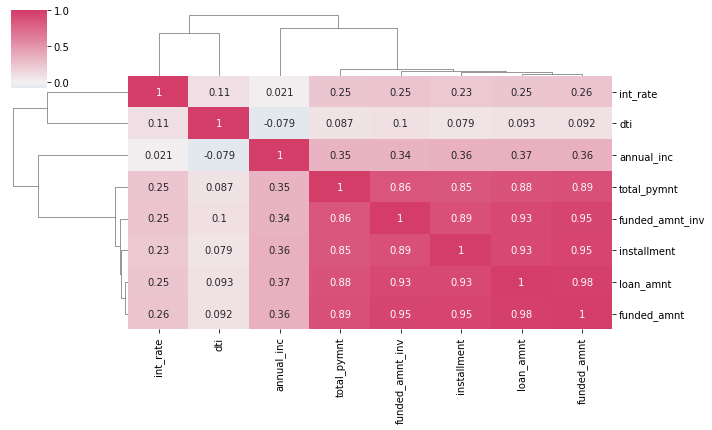

In [78]:
# Heatmap to show correlation amongst above columns

cmap = sns.diverging_palette(250, 0, as_cmap=True)
sns.clustermap(loan_data_filtered_correlation, annot=True, cmap=cmap, center=0,figsize=(10,6))
plt.show()


**Bivariate Analysis on annual income on Charged Off Proportion in bar chart**

In [79]:
# Group the data by income brackets and calculate the proportion of charged-off loans
income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']
loan_data_filtered['income_bracket'] = pd.cut(loan_data_filtered['annual_inc'], bins=income_bins, labels=income_labels)
print(loan_data_filtered['income_bracket'])

#Calculate charged of proportion
charged_off_prop = loan_data_filtered.groupby('income_bracket')['loan_status'].value_counts(normalize=True).unstack()['Charged Off']
print(charged_off_prop)


0         20k-40k
1         20k-40k
2           0-20k
3         40k-60k
5         20k-40k
           ...   
39711     60k-80k
39712       100k+
39713       0-20k
39714    80k-100k
39716     20k-40k
Name: income_bracket, Length: 34507, dtype: category
Categories (6, object): ['0-20k' < '20k-40k' < '40k-60k' < '60k-80k' < '80k-100k' < '100k+']
income_bracket
0-20k       0.180344
20k-40k     0.172537
40k-60k     0.149363
60k-80k     0.126514
80k-100k    0.106888
100k+       0.098291
Name: Charged Off, dtype: float64


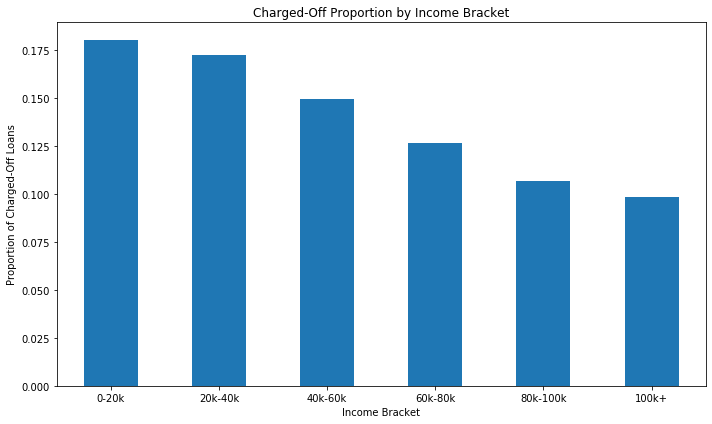

In [80]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
charged_off_prop.plot(kind='bar')
plt.xlabel('Income Bracket')
plt.ylabel('Proportion of Charged-Off Loans')
plt.title('Charged-Off Proportion by Income Bracket')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Insights :**


*   From the above bar chart we found that with increase in annual income charged off proportion got decreased and vice versa.
*   The customer having income range 100000+ has less chances of charged off.
*   The customer having income range 0 to 20000 has high chances of charged off.






**Bivariate Analysis for Purpose of Loan Vs Charged Off Proportion in bar chart**


In [81]:
# Calculate charged off proportion
charged_off_prop = loan_data_filtered.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack()['Charged Off']
charged_off_prop_sort = charged_off_prop.sort_values(ascending=False)
print(charged_off_prop_sort)




purpose
small_business        0.264430
renewable_energy      0.180723
educational           0.163333
moving                0.158915
other                 0.156349
medical               0.155993
house                 0.155340
debt_consolidation    0.147989
vacation              0.145833
home_improvement      0.121827
car                   0.109510
credit_card           0.102604
major_purchase        0.101756
wedding               0.094296
Name: Charged Off, dtype: float64


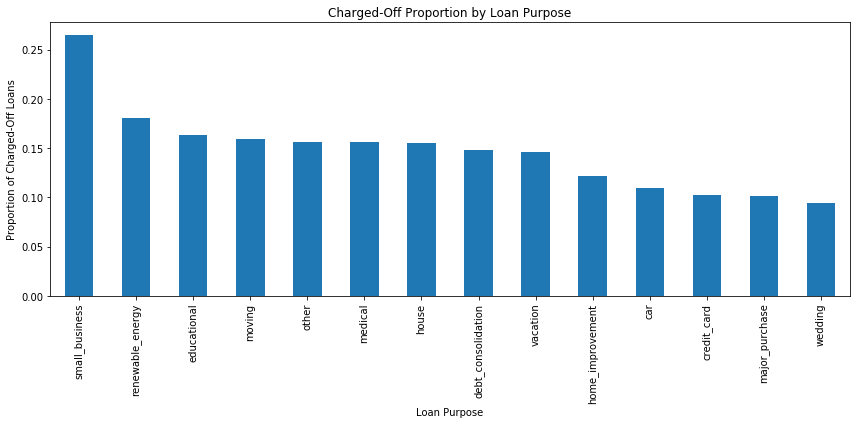

In [82]:
# Plot the bar chart
plt.figure(figsize=(12, 6))
charged_off_prop.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Loan Purpose')
plt.ylabel('Proportion of Charged-Off Loans')
plt.title('Charged-Off Proportion by Loan Purpose')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights :**

*   Small Business customers have high chances of getting charged off.
*   Customer having Wedding purpose loan have low chances of getting charged off.



**Bivarient Analysis of dti vs emp_length in box plot**

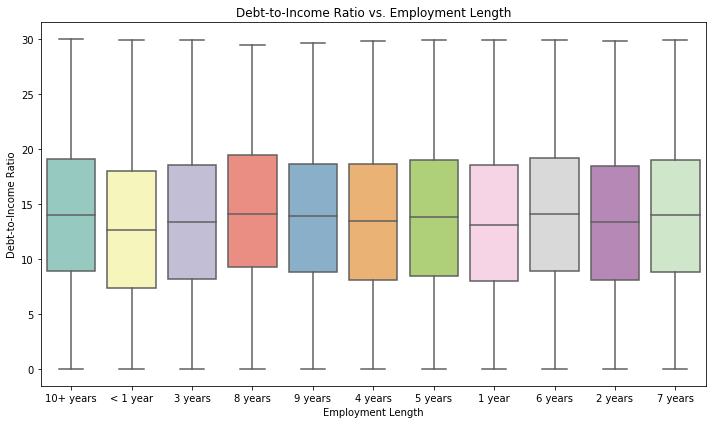

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_filtered, x='emp_length', y='dti', palette='Set3')
plt.xlabel('Employment Length')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Debt-to-Income Ratio vs. Employment Length')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



**Insight :**

From above box plots we found that 6+ years of experienced employees having debt to income ratio(dti) in maximum range apart from that rest years of experienced employees are more or less in same range of dti.



**Bivarient Analysis of dti vs interest rate in box plot**

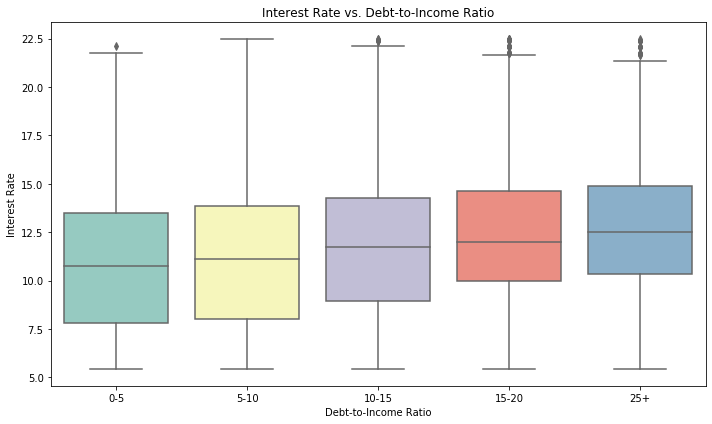

In [84]:
# Create dti buckets for easy analysis
loan_data_filtered['dti_buckets'] = pd.cut(loan_data_filtered['dti'], bins=np.arange(0, 30, 5), labels=['0-5', '5-10', '10-15', '15-20', '25+'])

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data_filtered, x='dti_buckets', y='int_rate', palette='Set3')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. Debt-to-Income Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Insights :**


*   When dti is low then the interest rate is also low.
*   The above bar chart shows no significant variations. There is slightly increase in interest rate with increase in dti.



**Bivarient Analysis of loan amount vs emp_length in box plot**

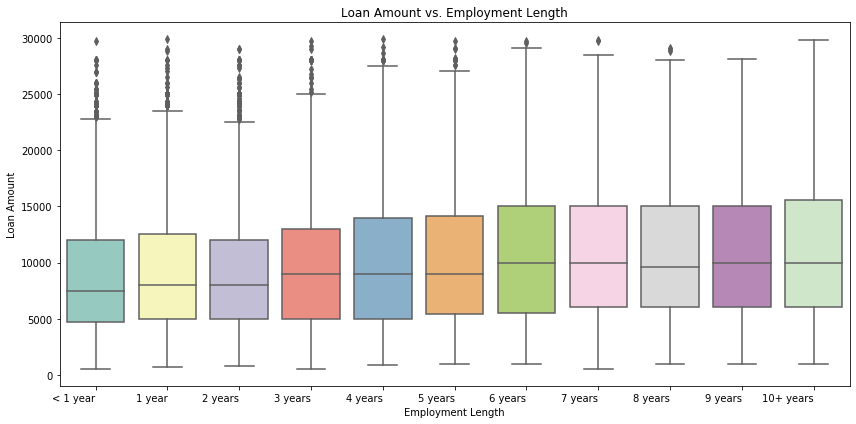

In [85]:
# Sort the employment length categories for better visualization
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data_filtered, x='emp_length', y='loan_amnt', order=emp_length_order, palette='Set3')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs. Employment Length')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()



**Insight :**

In above box plot it is showing that the employees experienced with 10+ years is taking more amount of loan and those who are less than 1 year is taken less amount of loan.


**MULTIVARIATE ANALYSIS**

In [86]:
#Create a dataframe with some variable on which we will do multivarient analysis
multivariate_dataframe = loan_data_filtered[['loan_amnt', 'annual_inc', 'issue_year','int_rate','loan_status']].copy()
multivariate_dataframe.head()

,loan_amnt,annual_inc,issue_year,int_rate,loan_status
0,5000,24000.0,2011,10.65,Fully Paid
1,2500,30000.0,2011,15.27,Charged Off
2,2400,12252.0,2011,15.96,Fully Paid
3,10000,49200.0,2011,13.49,Fully Paid
5,5000,36000.0,2011,7.90,Fully Paid


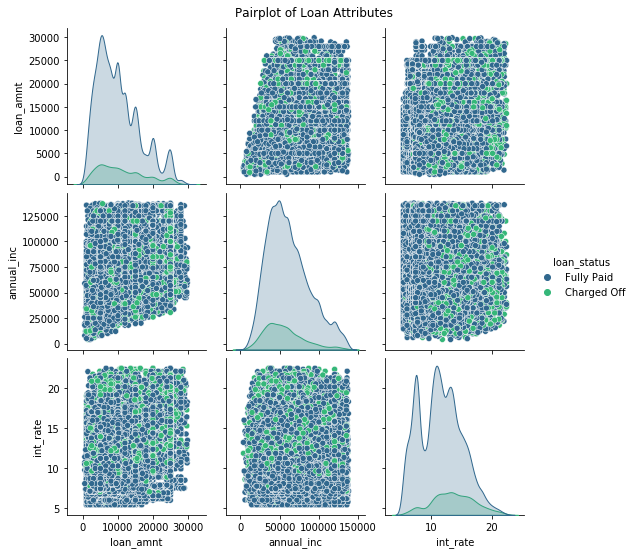

In [87]:
# Pairplot to visualize relationships between multiple variables
sns.pairplot(multivariate_dataframe, hue='loan_status', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Loan Attributes', y=1.02)
plt.show()


**Insights :**
*   There is an increase in number of charged off yearly.
*   When the charged off ratio is more then the interest rate is more.
*   There is an increase in interest rate with increase in loan amount.




